In [1]:
import numpy as np
import matplotlib
import pandas as pd

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

2024-07-05 13:38:39.544922: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
regressor = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
regressor.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=0)

In [5]:
res = regressor.predict(X_test)
res.reshape(96,1)
print(res)
print(res.shape)
print(Y_test)

[13.90113208 25.22509804 13.90113208 13.90113208 13.90113208 25.22509804
 13.90113208 13.90113208 13.90113208 30.70338028 13.90113208 22.6918677
 14.5025323  34.73078603 13.90113208 51.57046693 13.90113208 49.66730435
 14.42592018 35.9430137  15.16638756 51.64762238 13.90113208 15.12938053
 13.90113208 16.27347737 53.20737705 17.25420213 53.20737705 13.90113208
 16.4016573  34.80147541 13.90113208 37.52100529 17.20716814 51.64762238
 15.16638756 15.16638756 23.61214854 13.90113208 51.64762238 17.0760066
 69.8223301  22.97601881 16.4016573  16.4016573  13.90113208 53.20737705
 51.64053398 77.47928571 16.4016573  14.5025323  14.98573363 14.98573363
 20.20518519 30.70338028 51.57046693 15.12938053 13.90113208 17.33013158
 13.90113208 35.793125   15.12938053 35.54447489 15.12938053 13.90113208
 15.16638756 13.90113208 35.793125   17.20716814 17.90724696 15.16638756
 14.5025323  16.86632312 13.90113208 35.9299308  22.31201439 35.793125
 14.98573363 16.4016573  17.33013158 13.62179837 13.901

In [6]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)


0.7872880221974173
6.83950201161434
0.9539303053754816
8.44209766598441


100%|██████████| 100/100 [03:14<00:00,  1.95s/it]


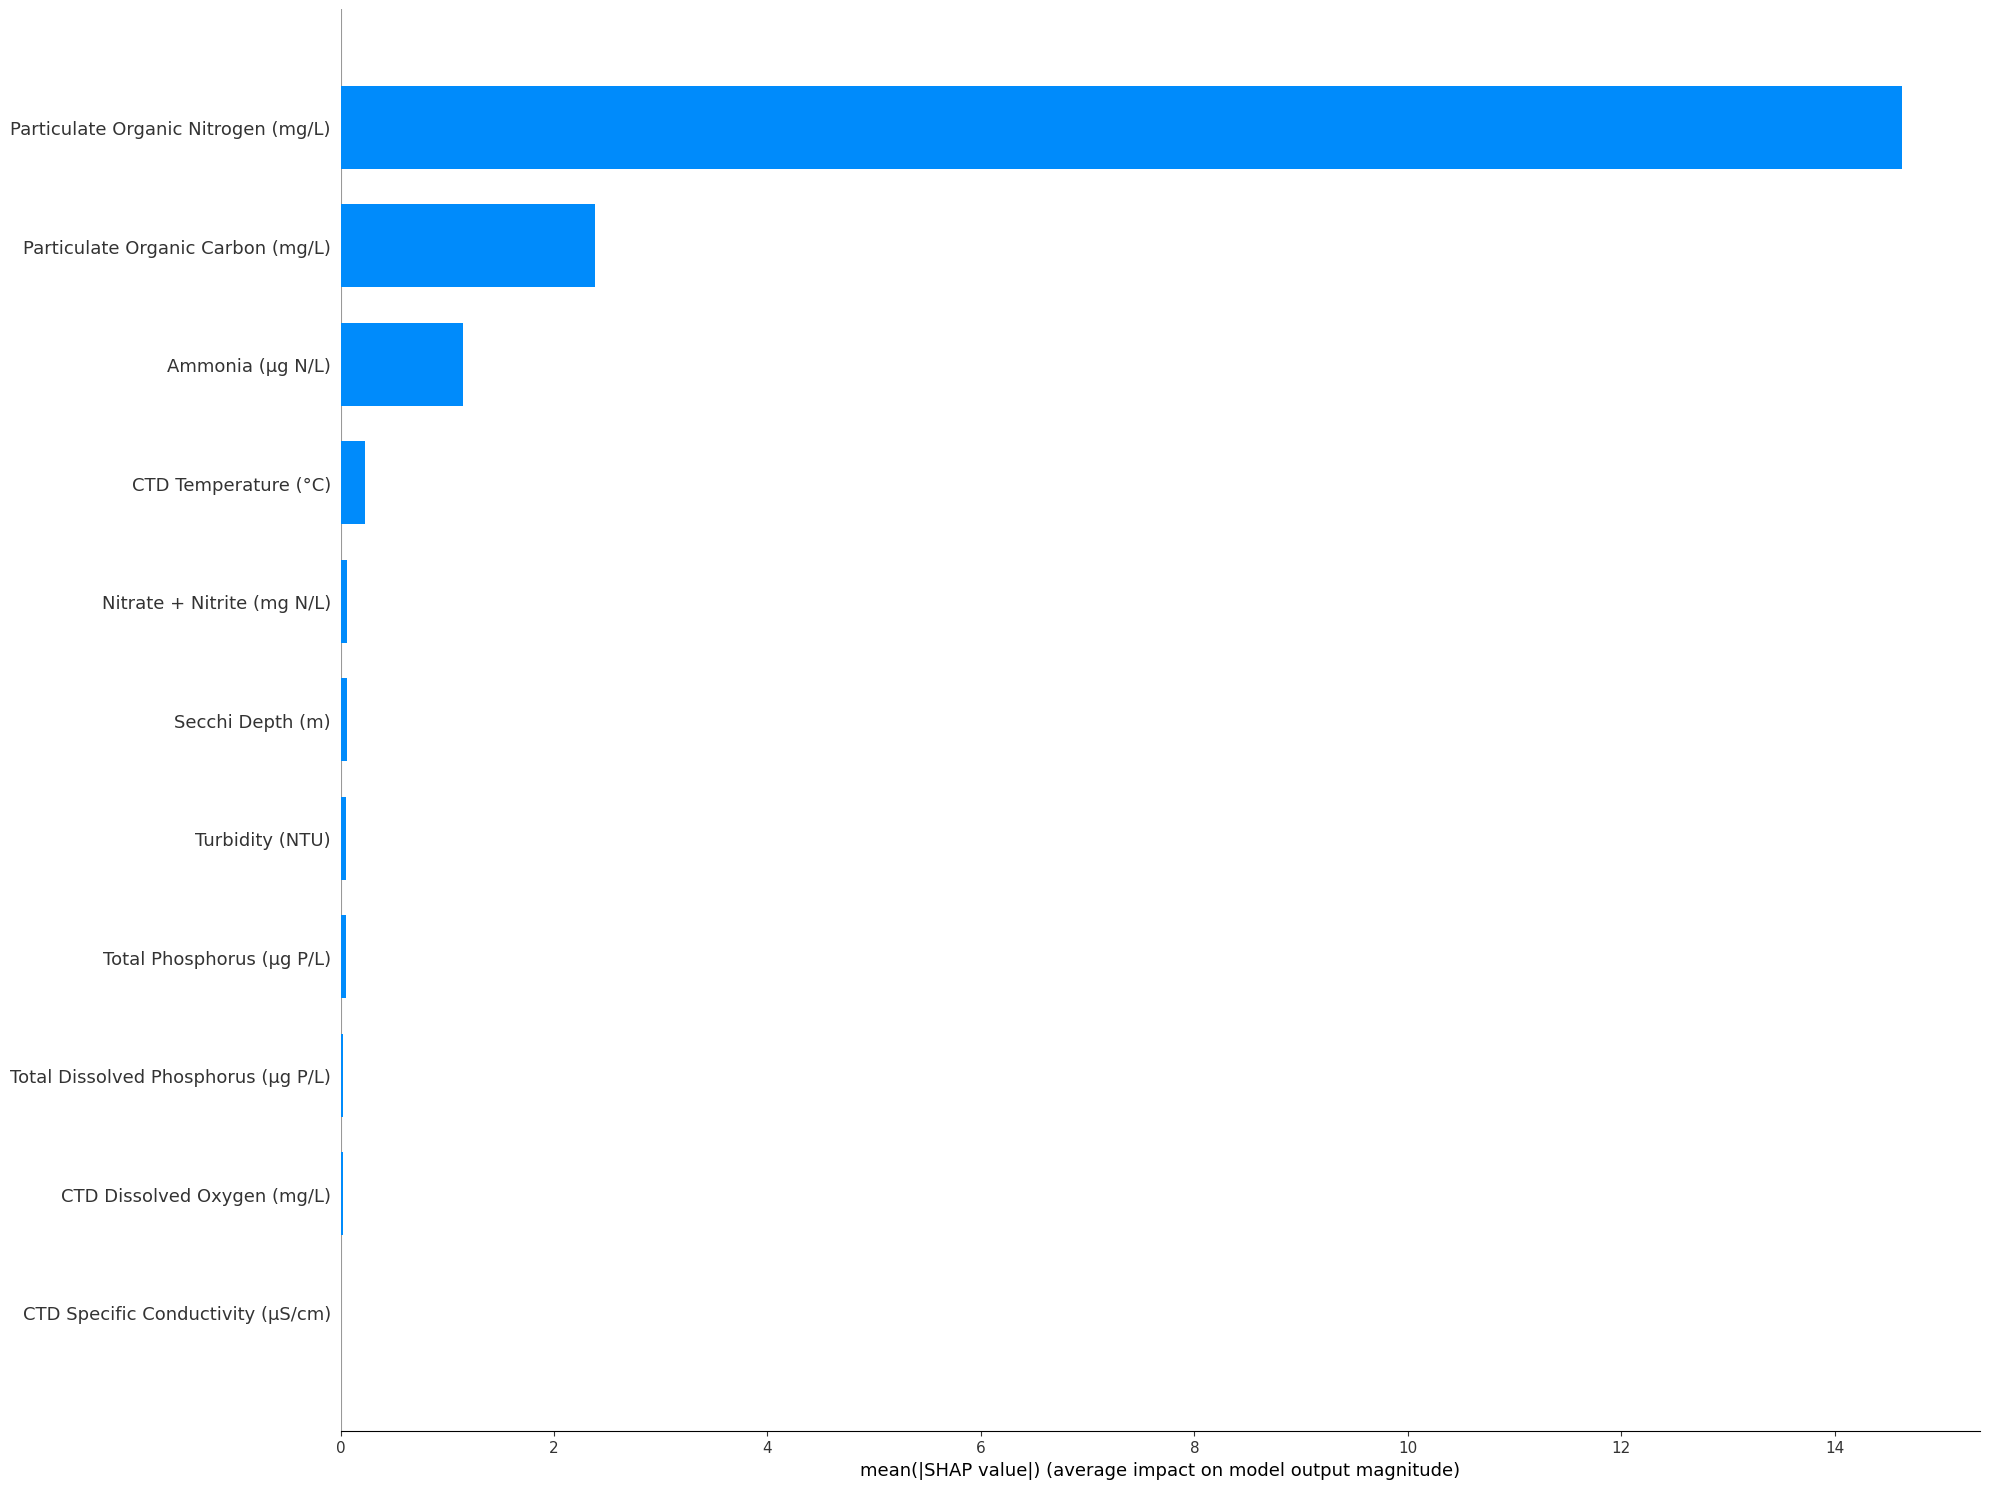

In [13]:
import shap
X_test_shap = shap.sample(X_train,nsamples = 100)
explainer = shap.KernelExplainer(regressor.predict, X_test_shap)
shap_values = explainer.shap_values(X_test_shap)
shap.summary_plot(shap_values, X_test_shap,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)



In [ ]:
#SHAP doesn't support Adaboost Regressors 
print(regressor.feature_importances_)

[0.00683081 0.01168833 0.00331199 0.05535064 0.00516417 0.01127702
 0.00755131 0.02304612 0.00414051 0.64706504 0.22457407]
